Load the preprocessed data

In [2]:
import pandas as pd
df_processed = pd.read_csv("../Data/preprocessed.csv", encoding="utf-8")

Train/Validation/Test Split

In [4]:
from sklearn.model_selection import train_test_split

target = "totalPrice"
X = df_processed.drop(columns=[target])
y = df_processed[target]

# First split: Train (70%) + Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Second split: Temp into Validation (15%) + Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Train set: (137056, 23)
Validation set: (29369, 23)
Test set: (29370, 23)


Train Model on Train + Validate on Validation Set

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train model
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Validation metrics
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {rmse_val:.2f}")
print(f"Validation R²: {r2_val:.4f}")


Validation RMSE: 0.04
Validation R²: 0.9985


Final Test EvaluationMmm

In [6]:
# Predict on test set
y_test_pred = model.predict(X_test)

# Test metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²: {r2_test:.4f}")


Test RMSE: 0.04
Test R²: 0.9984


In [7]:
import pandas as pd

# Assuming you already have these values from your runs
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
train_r2 = r2_score(y_train, model.predict(X_train))

metrics_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test"],
    "RMSE": [train_rmse, rmse_val, rmse_test],
    "R²": [train_r2, r2_val, r2_test]
})

print(metrics_df)


      Dataset      RMSE        R²
0       Train  0.015340  0.999779
1  Validation  0.040574  0.998467
2        Test  0.041062  0.998413


Visual Comparison

C:\Users\jains\AppData\Local\Temp\ipykernel_25036\2407362982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dataset", y="RMSE", data=metrics_df, palette="Blues_d")


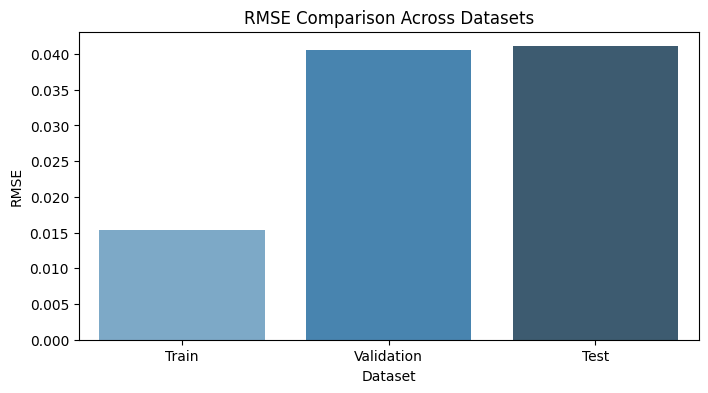

C:\Users\jains\AppData\Local\Temp\ipykernel_25036\2407362982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dataset", y="R²", data=metrics_df, palette="Greens_d")


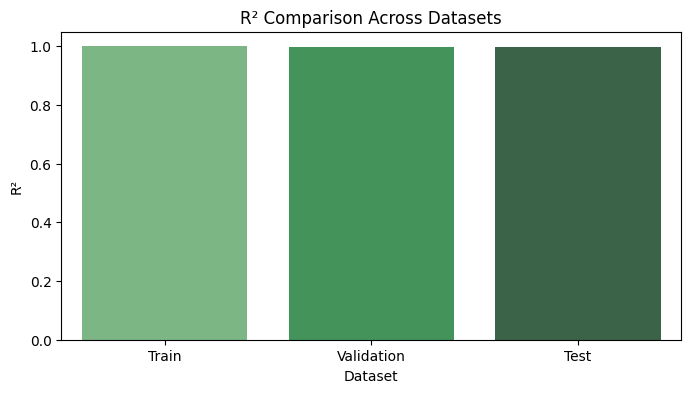

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# RMSE comparison
plt.figure(figsize=(8, 4))
sns.barplot(x="Dataset", y="RMSE", data=metrics_df, palette="Blues_d")
plt.title("RMSE Comparison Across Datasets")
plt.show()

# R² comparison
plt.figure(figsize=(8, 4))
sns.barplot(x="Dataset", y="R²", data=metrics_df, palette="Greens_d")
plt.title("R² Comparison Across Datasets")
plt.show()


Baseline Model Comparison

In [9]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)

# Predict & evaluate baseline
baseline_val_pred = baseline.predict(X_val)
baseline_test_pred = baseline.predict(X_test)

baseline_rmse_val = np.sqrt(mean_squared_error(y_val, baseline_val_pred))
baseline_r2_val = r2_score(y_val, baseline_val_pred)

baseline_rmse_test = np.sqrt(mean_squared_error(y_test, baseline_test_pred))
baseline_r2_test = r2_score(y_test, baseline_test_pred)

print(f"Baseline Validation RMSE: {baseline_rmse_val:.2f}, R²: {baseline_r2_val:.4f}")
print(f"Baseline Test RMSE: {baseline_rmse_test:.2f}, R²: {baseline_r2_test:.4f}")


Baseline Validation RMSE: 1.04, R²: -0.0000
Baseline Test RMSE: 1.03, R²: -0.0001
